In [1]:
import os
os.chdir('..')
from notebooks import config
import pandas as pd
import geopandas as gpd
import glob
from utils.geotif_io import readTiff
import numpy as np
from pyproj import Proj
from shapely.geometry import Point
import matplotlib.pyplot as plt
from utils.coorxy_transform import coorxy_transform


In [2]:
paths_truth = glob.glob(config.root+'/data/dset-l578/truth/*.tif')
paths_truth = sorted(paths_truth)
names_truth = [os.path.basename(path) for path in paths_truth]
names_satellite = [name[0:2] for name in names_truth]
names_satellite[0]


'l5'

### Get center coordinates (wgs84) of the landsat scenes

In [3]:
centers_wgs84 = []
for path in paths_truth:
    img, img_info = readTiff(path)
    bound = img_info['geoextent']
    bound_center = [(bound[0]+bound[1])/2, (bound[2]+bound[3])/2]
    center_lon, center_lat = coorxy_transform(srs_from=img_info['geosrs'], srs_to=4326, x=bound_center[0], y=bound_center[1])
    centers_wgs84.append(Point([center_lon, center_lat]))         # 
print('number of centers:',len(centers_wgs84))


number of centers: 31


In [4]:
## writh the data information to geopandas
dic = {'satellite': names_satellite,
    'name': names_truth,
        }
df = pd.DataFrame(dic)
geodf = gpd.GeoDataFrame(df, geometry=centers_wgs84, crs=4326)
geodf.head()

,satellite,name,geometry
0,l5,l5_scene_01_truth.tif,POINT (119.57033 -29.09508)
1,l5,l5_scene_02_truth.tif,POINT (66.38172 59.88045)
2,l5,l5_scene_03_truth.tif,POINT (61.77405 46.04538)
3,l5,l5_scene_04_truth.tif,POINT (125.44204 63.95033)
4,l5,l5_scene_05_truth.tif,POINT (113.91513 22.58016)


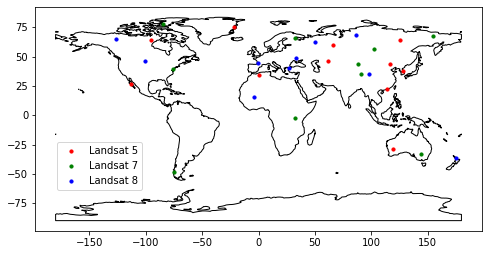

In [5]:
fig, ax = plt.subplots(figsize=(8,5))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.dissolve()
world.plot(ax=ax, color='white', edgecolor='black')
geodf[geodf.satellite=="l5"].plot(ax=ax, marker='o', markersize=10, color='red', label='Landsat 5')
geodf[geodf.satellite=="l7"].plot(ax=ax, marker='o', markersize=10, color='green', label='Landsat 7')
geodf[geodf.satellite=="l8"].plot(ax=ax, marker='o', markersize=10, color='blue', label='Landsat 8')
ax.legend(bbox_to_anchor=(.25, .42))


In [6]:
# path_fig = config.root + '/figures/dset_distribution'
# fig.savefig(path_fig)
